## Introduction   

### What is ecommerce shipping?
     
 - For ecommerce, the shipping process involves may services from receiving a customer order to the customer's delivery destination. The right e-commerce shipping strategy will depends on your customers, products and a variety of other factors.
     
 - Not every delivery goes according to plan. Unexpected delays are part of supply chain and consumers are less tolerant of delays than ever before, and rightfully so because the pace of technology and innovation is very much up for the challenge. To offer the reliable and effective shipping solution will help the business be profitable in the competition of ecommerce.  

### Data

- The small dataset is taken from kaggle and contains the following information:

    - ID: ID Number of Customers.
    - Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
    - Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
    - Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
    - Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
    - Cost of the product: Cost of the Product in US Dollars.
    - Prior purchases: The Number of Prior Purchase.
    - Product importance: The company has categorized the product in the various parameter such as low, medium, high.
    - Gender: Male and Female.
    - Discount offered: Discount offered on that specific product.
    - Weight in gms: It is the weight in grams.
    - Reached on time: It's the target variable, where 1 Indicates on time shipment and 0 not on time.
- 'csv' file: 'shipping.csv' (https://www.kaggle.com/code/ravillatejakumar/e-commerce-shipping-eda/data)

### Business problem to solve 
 
- An international e-commerce company wants to discover key insights from customer study to optimize shipping. The company sells electronic products and wants to identify what factors account for shipment delay. 
- To help the business find the solution, this notebook will use different ML techniques to build an effective predictive model.
- We are hoping to learn more from this data and thus explore its impact on predicting future shipping. 

## Import Libraries and Data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set(style="darkgrid") # sns.set()

import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

In [2]:
# load the data
df = pd.read_csv('Data/shipping.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
#Get a summary of the dataset and check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
# get statistic summary
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
df['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [7]:
# Check for missing values in dataset
print('dataset : missing {}'.format(df.isnull().any()))

dataset : missing ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Reached.on.Time_Y.N    False
dtype: bool


We see the dataset:
 - Very clean
 - No missing value 

## Data Visualization 

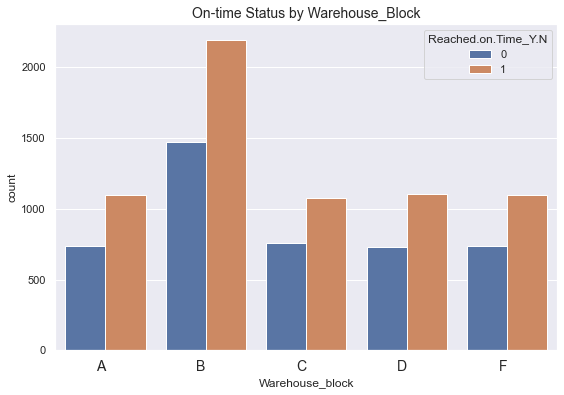

In [8]:
# 'Warehouse_block'
plt.figure(figsize=(9,6))
sns.countplot(x='Warehouse_block', data=df, hue='Reached.on.Time_Y.N')
plt.xticks(range(5),['A','B','C','D','F'],fontsize=14,horizontalalignment='right')
plt.title('On-time Status by Warehouse_Block', fontsize=14);

In [9]:
from mdutils.mdutils import MdUtils
image_text = "ship"
mdFile = MdUtils(file_name='README.md',title="Predict customers' response to the marketing champaign")
mdFile.create_md_file()

path = "./images/shipping.jpg"
mdFile.new_line(mdFile.new_inline_image(text=image_text, path=path))

'  \n![ship](./images/shipping.jpg)'

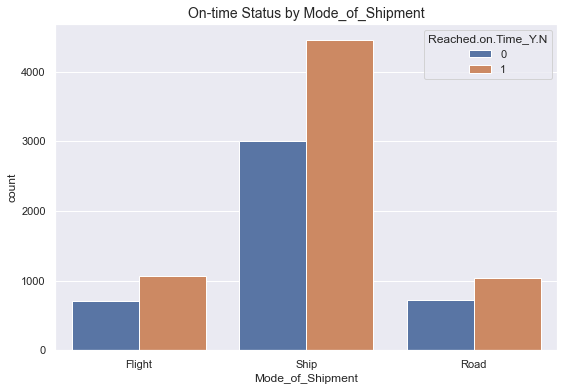

In [10]:
# 'Mode_of_Shipment'
plt.figure(figsize=(9,6))
sns.countplot(x='Mode_of_Shipment', data=df, hue='Reached.on.Time_Y.N')
plt.title('On-time Status by Mode_of_Shipment', fontsize=14);

 - As shown in the graph above, comparing to 'flight' and 'road', moving freight using 'cargo ship' on the oceans is the most lucrative trade route.  Due to the pandemic in March 2020, many industries have experienced supply-and-demand challenges. It got even worse when the Ever Given container ship block the Suez Canal for six days in March, 2021. There is more demand for goods to move around the globe, especially as a number of ports are still closed due to Covid outbreaks. 
 - Global shipping logistics firms are benefiting from this trend as trucking and flights are limited due to quarantine rules and travel restrictions.  

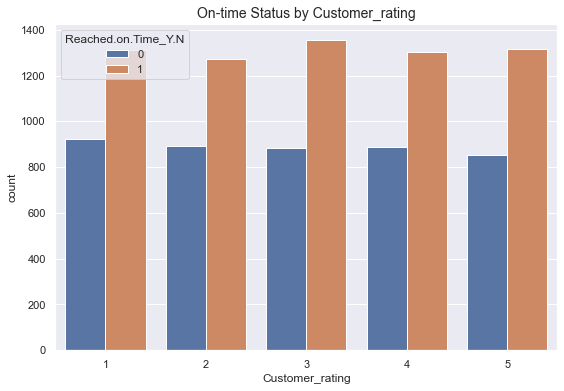

In [11]:
# 'Customer_rating'
plt.figure(figsize=(9,6))
sns.countplot(x='Customer_rating', data=df, hue='Reached.on.Time_Y.N')
plt.title('On-time Status by Customer_rating', fontsize=14);

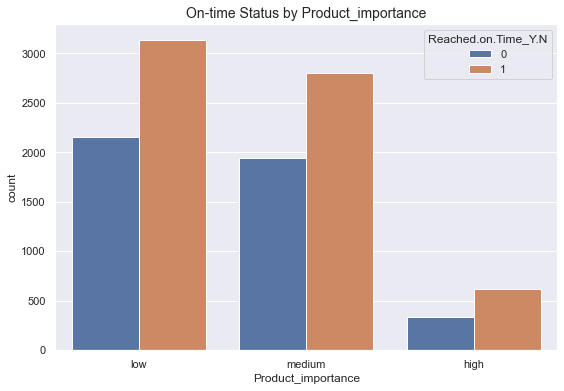

In [12]:
# 'Product_importance'
plt.figure(figsize=(9,6))
sns.countplot(x='Product_importance', data=df, hue='Reached.on.Time_Y.N')
plt.title('On-time Status by Product_importance', fontsize=14);

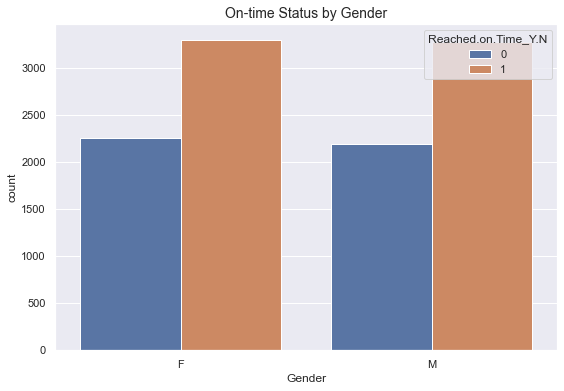

In [13]:
# 'Gender'
plt.figure(figsize=(9,6))
sns.countplot(x='Gender', data=df, hue='Reached.on.Time_Y.N')
plt.title('On-time Status by Gender', fontsize=14);

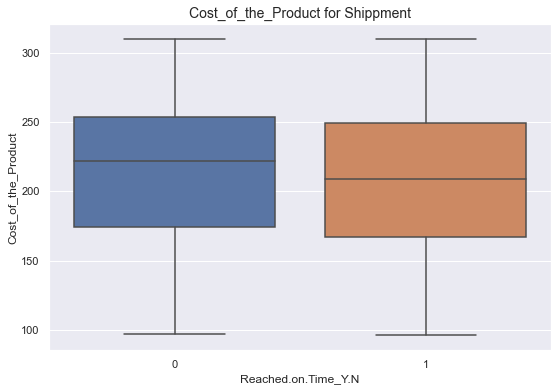

In [14]:
# 'Cost_of_the_Product'
plt.figure(figsize=(9,6))
sns.boxplot(y='Cost_of_the_Product', x='Reached.on.Time_Y.N', data=df)
plt.title('Cost_of_the_Product for Shippment', fontsize=14);

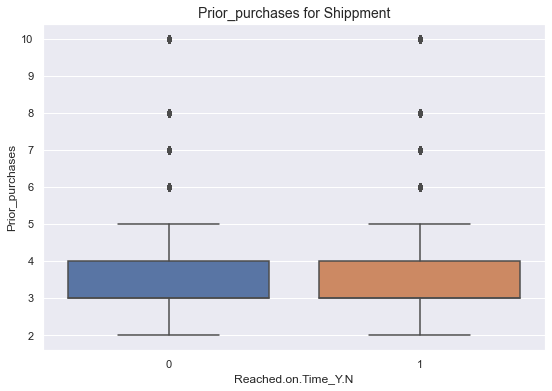

In [15]:
# 'Prior_purchases'
plt.figure(figsize=(9,6))
sns.boxplot(y='Prior_purchases', x='Reached.on.Time_Y.N', data=df)
plt.title('Prior_purchases for Shippment', fontsize=14);

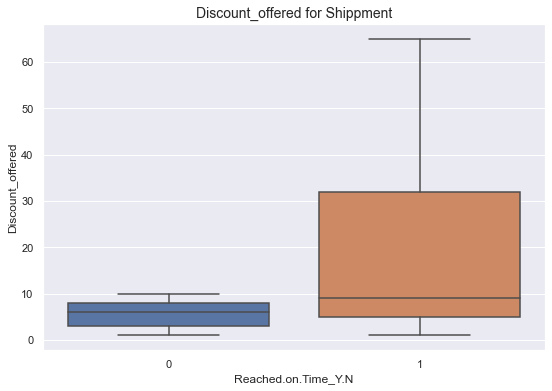

In [16]:
# 'Discount_offered'
plt.figure(figsize=(9,6))
sns.boxplot(y='Discount_offered', x='Reached.on.Time_Y.N', data=df)
plt.title('Discount_offered for Shippment', fontsize=14);

- Based on the graph above, shipment with more 'Discount_offered'  tends to be on time. When discounts are available, there could be a surge in shipments. Shipping discounts are volume-based, meaning that small businesses who only ship a small quantity of packages will not qualify for shipping discounts while larger businesses shipping thousands of packages a day will be able to benefit from volume-dependent shipping discounts provided by the shipping providers.   

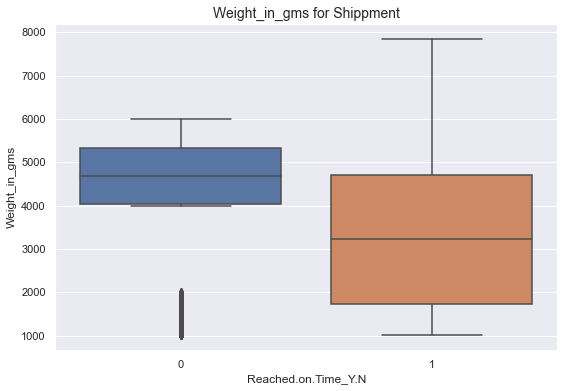

In [17]:
# 'Weight_in_gms'
plt.figure(figsize=(9,6))
sns.boxplot(y='Weight_in_gms', x='Reached.on.Time_Y.N', data=df)
plt.title('Weight_in_gms for Shippment', fontsize=14);

 - Based on the graph, the heavier goods have more volatile transit times and more delays due to many factors, such as container ships wait offshore, sometimes for months, because ports don’t have the capacity — the longshoremen, the warehouse staff, the customs inspectors, the maintenance crews — to unload ships any faster. . Along the global ecommerce boom, if you get frustrated and see a little warning about shipping delays at the top of a website and are told that “the supply chain” is at fault, it’s easy to imagine those problems as backed-up container ships or depleted fleets of semitrucks ...

## Data Preprocessing
### Encoding categorical features

In [18]:
df_encoded = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], drop_first=True)

In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         10999 non-null  int64
 1   Customer_care_calls        10999 non-null  int64
 2   Customer_rating            10999 non-null  int64
 3   Cost_of_the_Product        10999 non-null  int64
 4   Prior_purchases            10999 non-null  int64
 5   Discount_offered           10999 non-null  int64
 6   Weight_in_gms              10999 non-null  int64
 7   Reached.on.Time_Y.N        10999 non-null  int64
 8   Warehouse_block_B          10999 non-null  uint8
 9   Warehouse_block_C          10999 non-null  uint8
 10  Warehouse_block_D          10999 non-null  uint8
 11  Warehouse_block_F          10999 non-null  uint8
 12  Mode_of_Shipment_Road      10999 non-null  uint8
 13  Mode_of_Shipment_Ship      10999 non-null  uint8
 14  Product_importance_low

### Correlations between features

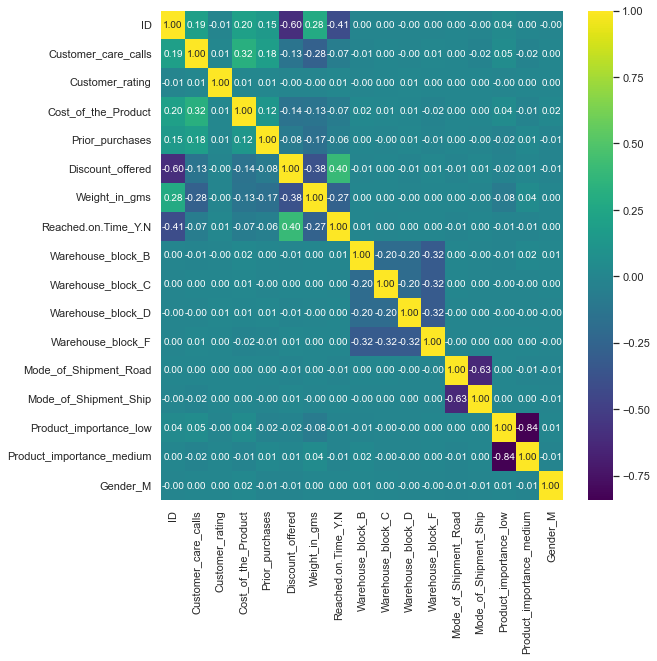

In [20]:
corr = df_encoded.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot=True,cmap="viridis",  fmt='.2f', annot_kws={"size": 10});

 - the 'Customer_care_calls' seems to be closely related to 'Prior_purchases', one of them which will be dropped.

## Modeling

I want to try out several different models and compare which model works best.
Start with a very simple model, a dummy classifier. Then compare with logistic regression and random forest classifiers.

### Train/Test split

In [21]:
#Split dataset into target and features
X = df_encoded.drop(['ID', 'Customer_care_calls', 'Reached.on.Time_Y.N'], axis=1)
y = df_encoded['Reached.on.Time_Y.N']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42) # stratify = df["Reached.on.Time_Y.N"]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(7699, 14)
(3300, 14)
(7699,)
(3300,)


In [22]:
train_columns = X_train.columns
print(train_columns)

Index(['Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Product_importance_low', 'Product_importance_medium', 'Gender_M'],
      dtype='object')


### Simple classifier

In [23]:
dclf = DummyClassifier(random_state=42)
dclf.fit(X_train, y_train)
y_pred = dclf.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.60      0.75      3300

    accuracy                           0.60      3300
   macro avg       0.50      0.30      0.38      3300
weighted avg       1.00      0.60      0.75      3300

[[   0    0]
 [1312 1988]]


In [24]:
### Scaling
#Gradient descent and distance based algorithms require features to be scaled, such as logistic regression and gradient boosting. On the other hand, tree based algorithms are not required by scaling, such as random forest model.

In [25]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Logistic Regression

In [26]:
# for a binary problem ==> Logistic Regression is used
lr = LogisticRegression(random_state=42) # class_weight = 'balanced'

#Build grid cearch for hyperparameter optimization
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.001, 0.01, 0.1], 
             'tol':[1e-5, 1e-4, 1e-3]}

clf = GridSearchCV(lr, parameters, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
print(clf.best_score_)

{'C': 0.001, 'tol': 1e-05}
0.7145406663864369


In [27]:
lr = LogisticRegression(C=0.01, tol=1e-5, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [28]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.58      0.53      0.56      1435
           1       0.66      0.71      0.68      1865

    accuracy                           0.63      3300
   macro avg       0.62      0.62      0.62      3300
weighted avg       0.63      0.63      0.63      3300

[[ 764  671]
 [ 548 1317]]


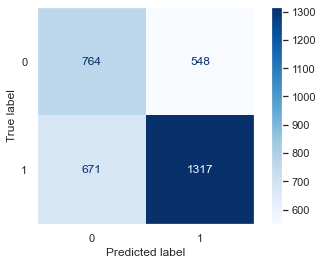

In [29]:
cf=confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cf).plot(cmap='Blues')
plt.grid(False)
plt.show();

ROC_AUC: 0.712840687417186


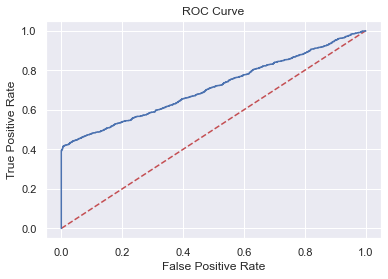

In [30]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lr.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("ROC_AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

In [31]:
#Explore feature importance 
coefficients = abs(lr.coef_).transpose()
features = X.columns
feature_importance = {}
for i, coef in enumerate(coefficients):
    feature_importance[features[i]] = coef
    
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index', columns=['feature_importance'])
feature_importance_df.sort_values('feature_importance', ascending=False).head()

,feature_importance
Discount_offered,0.120246
Warehouse_block_C,0.100804
Gender_M,0.089408
Mode_of_Shipment_Ship,0.063235
Warehouse_block_B,0.052353


### Random Forest

In [32]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=42)
)
n_est =  [10,20,40,50]
# 'randomforestclassifier__max_depth':[1,3,5,10]
grid_params = {'randomforestclassifier__n_estimators': n_est}
#dict for parameters to evaluate, 5-fold cross-validation
rf_grid_cv = GridSearchCV(RF_pipe, grid_params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': [10, 20, 40,
                                                                  50]},
             scoring='roc_auc', verbose=1)

In [33]:
print("Best Score:" + str(rf_grid_cv.best_score_))
print("Best Parameters: " + str(rf_grid_cv.best_params_))

Best Score:0.7356687044976881
Best Parameters: {'randomforestclassifier__n_estimators': 20}


In [34]:
# Fit the model based on the best number of estimators.
rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

[[ 573  739]
 [ 442 1546]]
              precision    recall  f1-score   support

           0       0.56      0.44      0.49      1312
           1       0.68      0.78      0.72      1988

    accuracy                           0.64      3300
   macro avg       0.62      0.61      0.61      3300
weighted avg       0.63      0.64      0.63      3300



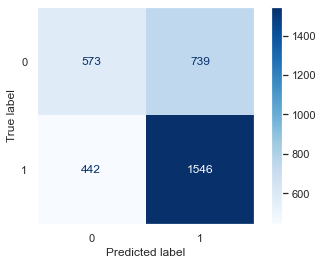

In [35]:
# plot confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cf).plot(cmap='Blues')
plt.grid(False)
plt.show();

ROC_AUC: 0.7454753291087991


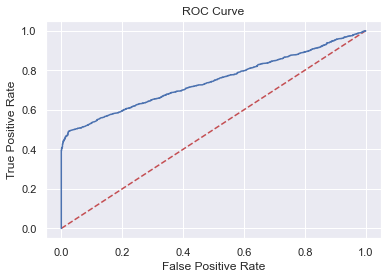

In [36]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("ROC_AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

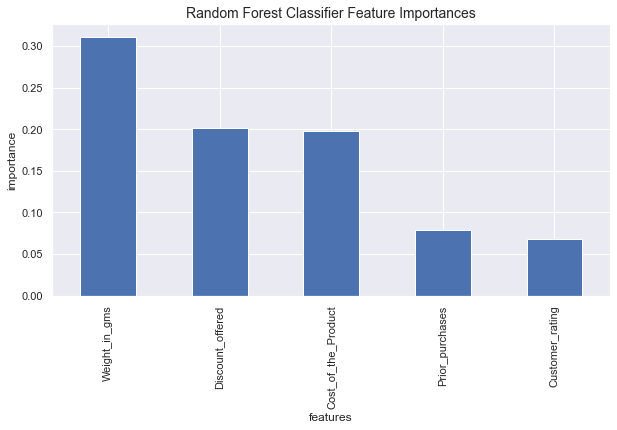

In [37]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=train_columns).sort_values(ascending=False)
rf_feat_imps[:5].plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Random Forest Classifier Feature Importances', fontsize=14);

## Conclusions

   - The dataset is more than just rows and columns. The story behind the dataset can point you to the resources to plan the shipping strategy.
   
   - Based on the results of ML models, several factors with large impact on the shipping are identified as follows:
       - Weight_in_gms
       - Discount_offered
       - Cost_of_the_Product
       - Prior_purchases
       - Customer_rating
       
   - Besides, we all know the common reasons for delays, such as:
       - Bad weather
       - High Peak seasons
       - Heavy Traffics
       
   - Behind the scenes, there are a lot of moving parts operating. Warehouses, delivery and pick up agents, documentation departments all perform together to deliver the freight.  Data science is transforming and benefiting eCommerce businesses immensely. And tech experts are constantly trying to find innovative ways to leverage the newest data collected and drive the business growth. 